# Notebook on Predicting Amsterdam Airbnb listing price

Opinions are my own.

This notebook has served as a playing ground for me to explore the Airbnb Amsterdam data and try to predict listing prices through several different methods, including:

* Linear Regression
* Random Forrest Regression
* OLS
* H2O Auto ML


## Getting up and running
Import all the libaries

In [1]:
# Import all the necessary libraries 

# commonly used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# visualization library
import seaborn as sns

# data manipulation utility libraries
import distutils
import datetime
import re

# sklearn libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# stats library
from scipy import stats
from scipy.stats import boxcox




In [2]:
# Import the data
df = pd.read_csv('../input/airbnb-amsterdam/listings_details.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data exploration

In [3]:
#Look at top rows of dataframe
df.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.03
2,20168,https://www.airbnb.com/rooms/20168,20181206172549,2018-12-06,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.18
3,25428,https://www.airbnb.com/rooms/25428,20181206172549,2018-12-06,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,0.09
4,27886,https://www.airbnb.com/rooms/27886,20181206172549,2018-12-06,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.03


In [4]:
#Quick summary of dataframe
df.describe()


,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,2.003000e+04,2.003000e+04,0.0,0.0,0.0,2.003000e+04,0.0,20026.000000,20026.000000,0.0,...,20030.000000,17391.000000,17381.000000,17383.000000,17369.000000,17378.000000,17370.000000,17371.000000,20030.000000,17624.00000
mean,1.541725e+07,2.018121e+13,NaN,NaN,NaN,4.868570e+07,NaN,6.105812,6.105812,NaN,...,21.560459,94.849520,9.679765,9.465627,9.735563,9.785361,9.421531,9.175004,4.734698,1.06208
std,8.569404e+06,3.906348e+00,NaN,NaN,NaN,5.649635e+07,NaN,30.388516,30.388516,NaN,...,43.240292,6.648685,0.685271,0.867973,0.646557,0.599409,0.727931,0.805422,22.921886,1.33332
min,2.818000e+03,2.018121e+13,NaN,NaN,NaN,3.159000e+03,NaN,0.000000,0.000000,NaN,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.01000
25%,8.188423e+06,2.018121e+13,NaN,NaN,NaN,8.093516e+06,NaN,1.000000,1.000000,NaN,...,3.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.27000
50%,1.563049e+07,2.018121e+13,NaN,NaN,NaN,2.369450e+07,NaN,1.000000,1.000000,NaN,...,8.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.62000
75%,2.202577e+07,2.018121e+13,NaN,NaN,NaN,6.827535e+07,NaN,1.000000,1.000000,NaN,...,22.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.23000
max,3.058041e+07,2.018121e+13,NaN,NaN,NaN,2.293612e+08,NaN,698.000000,698.000000,NaN,...,695.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,208.000000,11.85000


In [5]:
#number of rows and columns
df.shape


(20030, 96)

In [6]:
#sum of NaN values in price column
np.sum(df.price.notnull())

20030

In [7]:
# price column
df.price

0         $59.00
1        $160.00
2         $80.00
3        $125.00
4        $150.00
          ...   
20025    $340.00
20026    $150.00
20027     $80.00
20028     $55.00
20029    $220.00
Name: price, Length: 20030, dtype: object

In [8]:
# check out all columns with numeric values
num_vars = df.select_dtypes(include=['float', 'int']).columns
num_vars

Index(['id', 'scrape_id', 'thumbnail_url', 'medium_url', 'xl_picture_url',
       'host_id', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [9]:
# check out all columns with categorical values
num_cat = df.select_dtypes(include=['object']).columns

num_cat

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'picture_url',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated',
       'has_availability', 'calendar_last_scraped', 'first_review',
       'last_review', 'requires_license', 'license', '

In [10]:
#check values in different neighbourhood columns
df[['neighbourhood','neighborhood_overview','neighbourhood_cleansed']]

,neighbourhood,neighborhood_overview,neighbourhood_cleansed
0,Indische Buurt,"Indische Buurt (""Indies Neighborhood"") is a ne...",Oostelijk Havengebied - Indische Buurt
1,Spaarndammer en Zeeheldenbuurt,Welcome to the Spaarndammerbuurt! From the beg...,Westerpark
2,Grachtengordel,Located just in between famous central canals....,Centrum-Oost
3,Grachtengordel,NaN,Centrum-West
4,Westelijke Eilanden,"Central, quiet, safe, clean and beautiful.",Centrum-West
...,...,...,...
20025,Watergraafsmeer,"Restaurants supermarkets, 5 Minutes inner inn...",Watergraafsmeer
20026,Indische Buurt,My Home Sweet Home is located in the beautiful...,Oostelijk Havengebied - Indische Buurt
20027,Indische Buurt,NaN,Oud-Oost
20028,Indische Buurt,My Home Sweet Home is located in the beautiful...,Oostelijk Havengebied - Indische Buurt


In [11]:
# see ratio of categorical values 
df.neighbourhood_cleansed.value_counts() / df.shape[0]

De Baarsjes - Oud-West                    0.175487
De Pijp - Rivierenbuurt                   0.124463
Centrum-West                              0.116126
Centrum-Oost                              0.086370
Westerpark                                0.074388
Zuid                                      0.071942
Oud-Oost                                  0.064004
Bos en Lommer                             0.057164
Oostelijk Havengebied - Indische Buurt    0.047878
Oud-Noord                                 0.028507
Watergraafsmeer                           0.027559
IJburg - Zeeburgereiland                  0.022566
Slotervaart                               0.019621
Noord-West                                0.015976
Buitenveldert - Zuidas                    0.013080
Noord-Oost                                0.012831
Geuzenveld - Slotermeer                   0.010584
Osdorp                                    0.007938
De Aker - Nieuw Sloten                    0.007089
Gaasperdam - Driemond          

# **Data Preparation**

* Dropping many columns
* Cleaning some data quality issues
* Cutting outliers based on mod-z
* Create dummy variables

In [12]:
# drop columns that are irelevant 
df_clean = df.drop(['id', 'scrape_id', 'thumbnail_url', 'medium_url', 'xl_picture_url',
              'host_id', 'host_total_listings_count', 'neighbourhood_group_cleansed',
              'latitude','longitude', 'calculated_host_listings_count', 
              'listing_url', 'last_scraped', 'name', 'summary', 'space',
              'description', 'experiences_offered', 'neighborhood_overview', 'notes',
              'transit', 'access', 'interaction', 'house_rules', 'picture_url',
              'host_url', 'host_name', 'host_location', 'host_about',
              'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood','host_verifications',
              'street', 'neighbourhood', 'city', 'state',
              'zipcode', 'market', 'smart_location', 'country_code', 'country',
              'weekly_price', 'monthly_price','security_deposit', 'cleaning_fee',
              'extra_people', 'calendar_last_scraped', 'requires_license', 'license',
              'jurisdiction_names','guests_included','host_response_time','host_response_rate',
              'host_acceptance_rate','square_feet'
             ], axis=1)



# #Drop all NaN values 

In [13]:
# drop all NaN values
df_clean = df_clean.dropna()

## Get rid of string items in Price column

In [14]:
# use string.replace to get rid of string items in price column
df_clean = df_clean.assign(price=df_clean['price'].str.replace(r'$', ''))
df_clean = df_clean.assign(price=df_clean['price'].str.replace(r',', ''))

#Set price as float type
df_clean['price'] = df_clean['price'].astype(float)

## Get boolean expression from 'f'& 't' string

In [15]:
# use lambda and distutils to go from string to boolean expression
df_clean = df_clean.assign(host_is_superhost=df_clean['host_is_superhost'].apply(lambda x: bool(distutils.util.strtobool(x))))
df_clean = df_clean.assign(host_has_profile_pic=df_clean['host_has_profile_pic'].apply(lambda x: bool(distutils.util.strtobool(x))))
df_clean = df_clean.assign(host_identity_verified=df_clean['host_identity_verified'].apply(lambda x: bool(distutils.util.strtobool(x))))
df_clean = df_clean.assign(is_location_exact=df_clean['is_location_exact'].apply(lambda x: bool(distutils.util.strtobool(x))))
df_clean = df_clean.assign(instant_bookable=df_clean['instant_bookable'].apply(lambda x: bool(distutils.util.strtobool(x))))
df_clean = df_clean.assign(is_business_travel_ready=df_clean['is_business_travel_ready'].apply(lambda x: bool(distutils.util.strtobool(x))))
df_clean = df_clean.assign(require_guest_profile_picture=df_clean['require_guest_profile_picture'].apply(lambda x: bool(distutils.util.strtobool(x))))
df_clean = df_clean.assign(require_guest_phone_verification=df_clean['require_guest_phone_verification'].apply(lambda x: bool(distutils.util.strtobool(x))))


## Identify usefull amenities

In [16]:
# find amenity availability by amenity
df_clean = df_clean.assign(has_tv=df_clean['amenities'].apply(lambda x: x.find('Wifi') != -1))
df_clean = df_clean.assign(has_fireplace=df_clean['amenities'].apply(lambda x: x.find('Indoor fireplace') != -1))
df_clean = df_clean.assign(has_kitchen=df_clean['amenities'].apply(lambda x: x.find('Kitchen') != -1))
df_clean = df_clean.assign(has_family_friendly=df_clean['amenities'].apply(lambda x: x.find('Family/kid friendly') != -1))
df_clean = df_clean.assign(has_host_greeting=df_clean['amenities'].apply(lambda x: x.find('Host greets you') != -1))
df_clean = df_clean.assign(has_24hrs_checkin=df_clean['amenities'].apply(lambda x: x.find('24-hour check-in') != -1))
df_clean = df_clean.assign(has_breakfast=df_clean['amenities'].apply(lambda x: x.find('Breakfast') != -1))
df_clean = df_clean.assign(has_pets=df_clean['amenities'].apply(lambda x: x.find('Pets live on this property') != -1))
df_clean = df_clean.assign(has_dishwasher=df_clean['amenities'].apply(lambda x: x.find('Dishwasher') != -1))
df_clean = df_clean.assign(has_private_entrance=df_clean['amenities'].apply(lambda x: x.find('Private entrance') != -1))
df_clean = df_clean.assign(has_patio_balcony=df_clean['amenities'].apply(lambda x: x.find('Patio or balcony') != -1))
df_clean = df_clean.assign(has_self_checkin=df_clean['amenities'].apply(lambda x: x.find('Self check-in') != -1))
df_clean = df_clean.assign(has_workspace=df_clean['amenities'].apply(lambda x: x.find('Laptop friendly workspace') != -1))
df_clean = df_clean.assign(has_bathtub=df_clean['amenities'].apply(lambda x: x.find('Bathtub') != -1))
df_clean = df_clean.assign(has_longterm=df_clean['amenities'].apply(lambda x: x.find('Long term stays allowed') != -1))
df_clean = df_clean.assign(has_parking=df_clean['amenities'].apply(lambda x: x.find('Free parking on premises') != -1))
df_clean = df_clean.assign(has_garden=df_clean['amenities'].apply(lambda x: x.find('Garden or backyard') != -1))

# drop amenities column
df_clean = df_clean.drop(['amenities'],axis=1)

## Use datetime calculation to get days metric for Host Since

In [17]:
# create days delta calculation function
day_calc = lambda x: (datetime.date.today() - datetime.datetime.strptime(x, "%Y-%m-%d").date()).days

# apply on host_since column
df_clean = df_clean.assign(host_since=df_clean['host_since'].apply(day_calc))

## Drop some more columns

In [18]:
#drop columns that will not add more value than host since column
df_clean = df_clean.drop(['first_review','last_review'],axis=1)

## Check outliers

In [19]:
# max price
df_clean.price.max()

8500.0

In [20]:
# ratio of occurrences of value by certain column
df_clean.number_of_reviews.value_counts() / df_clean.shape[0]

1      0.067993
2      0.066955
3      0.061361
4      0.055075
5      0.049193
         ...   
275    0.000058
291    0.000058
307    0.000058
410    0.000058
527    0.000058
Name: number_of_reviews, Length: 352, dtype: float64

In [21]:
# ratio of occurrences of value by certain column
df_clean.minimum_nights.value_counts() / df_clean.shape[0]
    

2       0.422895
3       0.257266
1       0.144291
4       0.080681
5       0.044810
7       0.020704
6       0.010611
10      0.003172
14      0.002999
30      0.002134
8       0.001211
60      0.001096
21      0.001038
20      0.000980
9       0.000750
25      0.000519
12      0.000519
90      0.000461
15      0.000461
13      0.000404
28      0.000404
29      0.000288
40      0.000288
45      0.000231
27      0.000173
24      0.000115
180     0.000115
100     0.000115
59      0.000115
31      0.000115
50      0.000115
222     0.000058
19      0.000058
365     0.000058
52      0.000058
18      0.000058
11      0.000058
70      0.000058
300     0.000058
22      0.000058
186     0.000058
230     0.000058
999     0.000058
185     0.000058
1001    0.000058
26      0.000058
95      0.000058
Name: minimum_nights, dtype: float64

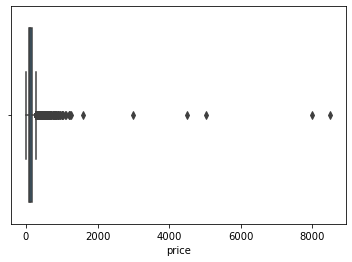

In [22]:
# check boxplot for price
sns.boxplot(x=df_clean['price'])


## Cut outliers for Price using Mod-z 

In [23]:
# create mod_z function (copied from: https://stackoverflow.com/questions/58127935/how-to-calculate-modified-z-score-and-iqr-on-each-column-of-the-dataframe)
def mod_z(col: pd.Series, thresh: float=3.5) -> pd.Series:
    med_col = col.median()
    med_abs_dev = (np.abs(col - med_col)).median()
    mod_z = 0.7413 * ((col - med_col) / med_abs_dev)
    mod_z = mod_z[np.abs(mod_z) < thresh]
    return np.abs(mod_z)

# run mod_z function on dataframe
df_mod_z = df_clean.select_dtypes(include=[np.number]).apply(mod_z)

In [24]:
#Apply above function to price 
df_clean_filtered = df_clean[df_mod_z['price'] >= 0]
df_clean_filtered = df_clean_filtered[df_clean_filtered['price'] > 0]

#check shape
df_clean_filtered.shape

(16365, 54)

In [25]:
# check summary
df_clean_filtered.describe()

,host_since,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,...,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000
mean,2028.958937,4.946471,2.759181,1.110419,1.361442,1.722090,131.605438,3.137244,623.603911,4.447724,...,56.218760,25.149038,94.820837,9.678766,9.463917,9.732050,9.783868,9.409288,9.176841,1.085888
std,657.555132,24.507153,1.092292,0.839856,0.779107,1.137892,51.733612,12.348336,541.965627,7.390356,...,99.964686,46.479786,6.621718,0.685351,0.867257,0.646807,0.595681,0.727493,0.805605,1.363157
min,578.000000,0.000000,1.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.010000
25%,1542.000000,1.000000,2.000000,1.000000,1.000000,1.000000,95.000000,2.000000,21.000000,0.000000,...,0.000000,4.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.270000
50%,2072.000000,1.000000,2.000000,1.000000,1.000000,1.000000,120.000000,2.000000,1124.000000,0.000000,...,3.000000,11.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,0.620000
75%,2522.000000,1.000000,4.000000,1.000000,2.000000,2.000000,160.000000,3.000000,1125.000000,6.000000,...,63.000000,25.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.250000
max,4292.000000,698.000000,17.000000,100.500000,12.000000,32.000000,290.000000,1001.000000,9999.000000,30.000000,...,365.000000,695.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,11.850000


## Cut outliers with hardcoded parameter

In [26]:
#Cut outliers
df_clean_filtered = df_clean_filtered[df_clean_filtered['host_listings_count'] < 60]
df_clean_filtered = df_clean_filtered[df_clean_filtered['bathrooms'] < 20]
df_clean_filtered = df_clean_filtered[df_clean_filtered['beds'] < 20]
df_clean_filtered = df_clean_filtered[df_clean_filtered['minimum_nights'] < 365]
df_clean_filtered = df_clean_filtered[df_clean_filtered['maximum_nights'] < 2000]

#Check shape
df_clean_filtered.shape

(16059, 54)

Drop a few final columns


In [27]:
# drop some  because they're too tricky 
df_clean_filtered_drop = df_clean_filtered.drop(['calendar_updated','has_availability'],axis=1)

# Create dummy variables


In [28]:
# create dummy in dataframe function
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [29]:
#Set categorical columns to be dummied
cat_cols_lst = df_clean_filtered_drop.select_dtypes(include=['object']).columns

#Apply create dummy function
df_model = create_dummy_df(df_clean_filtered_drop, cat_cols_lst, dummy_na=False) #Use your newly created function

#check df
df_model

,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,...,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_60
0,4292,True,1.0,True,False,False,2,1.5,1.0,2.0,...,0,1,0,0,0,0,1,0,1,0
1,4262,False,1.0,True,True,True,5,1.0,2.0,2.0,...,0,0,0,0,0,0,1,1,0,0
2,3858,False,2.0,True,False,True,2,1.0,1.0,1.0,...,0,0,0,0,0,0,1,0,1,0
3,3870,False,2.0,True,False,False,3,1.0,1.0,1.0,...,0,0,0,0,0,0,1,0,1,0
4,3747,True,1.0,True,True,True,2,1.0,1.0,1.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19769,578,False,4.0,True,False,False,3,1.0,0.0,2.0,...,0,0,0,0,0,0,1,0,1,0
19794,665,False,13.0,True,False,True,2,1.0,1.0,1.0,...,0,1,0,0,0,0,1,0,0,0
19866,2276,False,1.0,True,True,True,1,1.0,1.0,1.0,...,0,1,0,0,0,0,1,1,0,0
19975,1883,True,2.0,True,True,True,4,1.5,2.0,2.0,...,0,0,0,0,0,0,1,0,1,0


## Check normal distribution of Response variable

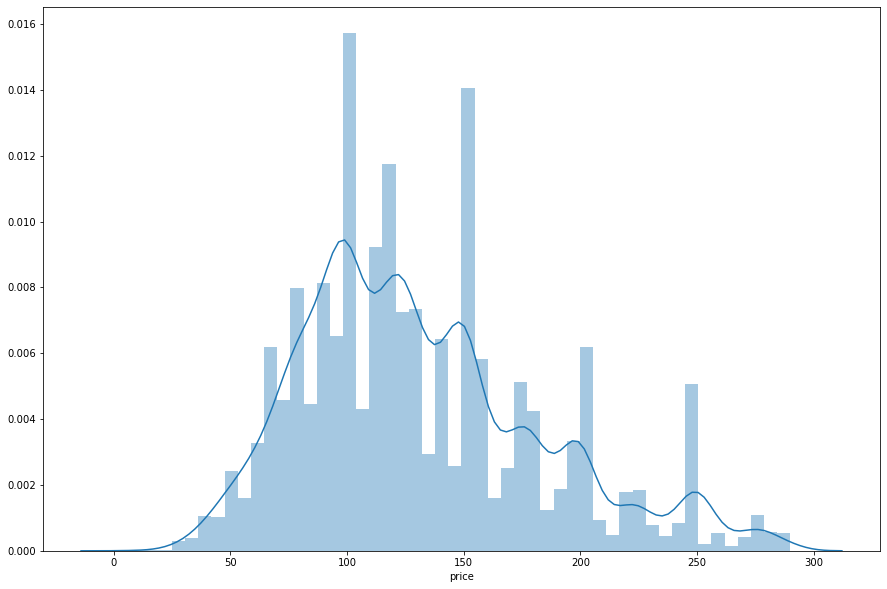

In [30]:
#plot distribution of Price
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df_model['price'])

# Preprocessing

* Normalize some columns to combine them
* Transform some data to create normal distribution of input variables
* Standardization using StandardScaler

## Normalize and combine 

In [31]:
#Import Normalizer from sklearn
from sklearn.preprocessing import Normalizer 

#Set variables to normalize
norm_vars = ['beds','bedrooms','accommodates']

# initiate normalizer and apply to scaled data array
normalize = Normalizer().fit(df_model[norm_vars])
norm_array = normalize.transform(df_model[norm_vars])

# create a DataFrame from the array
df_model_norm_vars = pd.DataFrame(norm_array, columns = norm_vars, index = df_model.index)

# merge new DataFrame with full dataframe model 
df_model_merged = pd.merge(df_model_norm_vars,df_model.drop(norm_vars,axis=1), right_index=True, left_index=True)

# create combined column for beds, bedrooms and acommodates
df_model_merged['combine_beds_bedrooms_acommodates'] = df_model_merged['beds'] + df_model_merged['bedrooms'] + df['accommodates']

# drop already combined variables
df_model_merged = df_model_merged.drop(['beds','bedrooms','accommodates'],axis=1)

# # Check normal distribution of all numerical input variables 

Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)


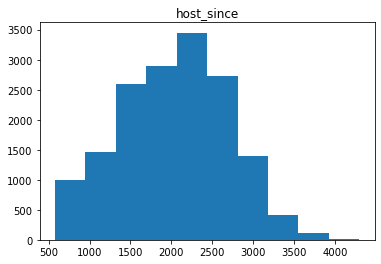

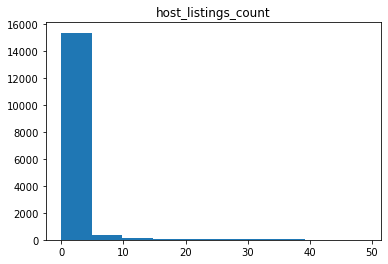

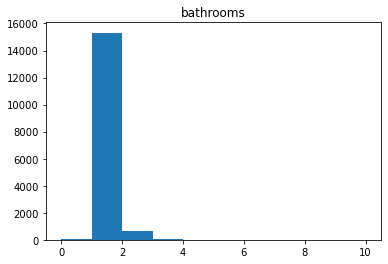

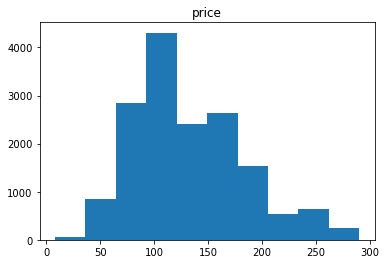

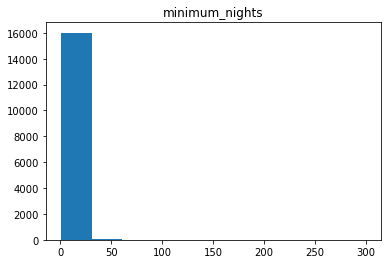

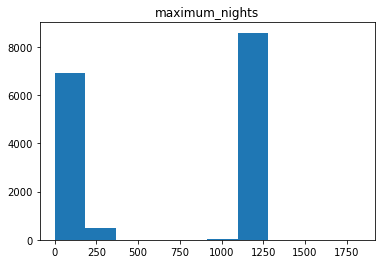

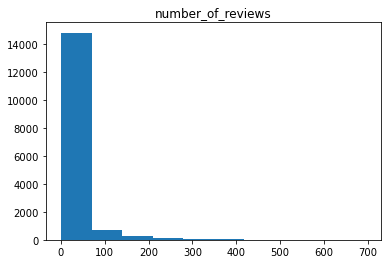

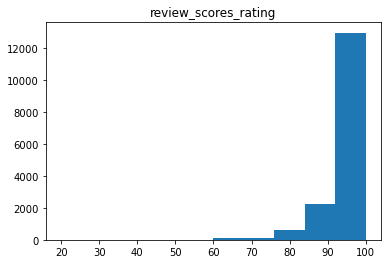

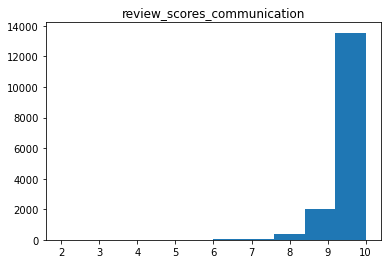

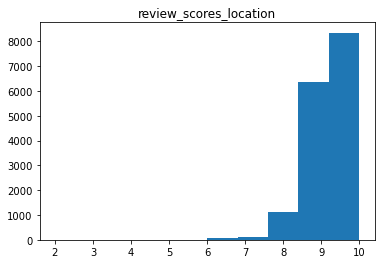

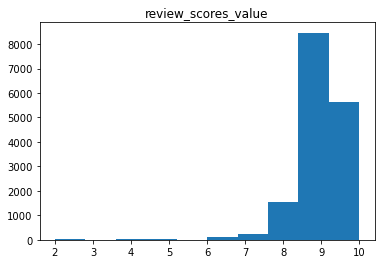

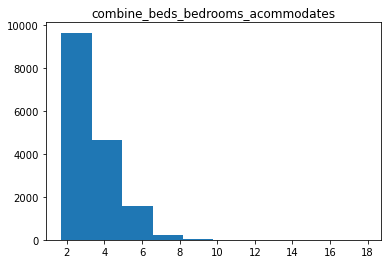

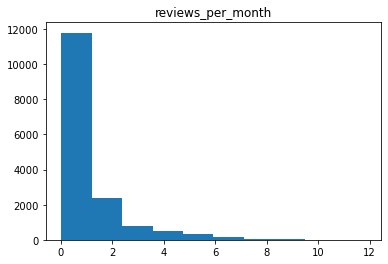

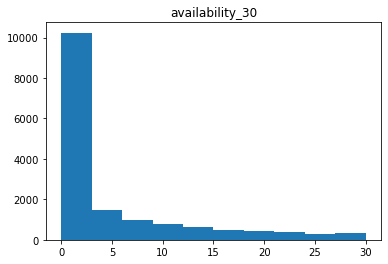

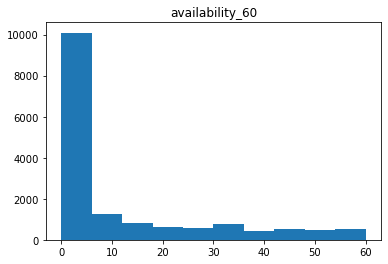

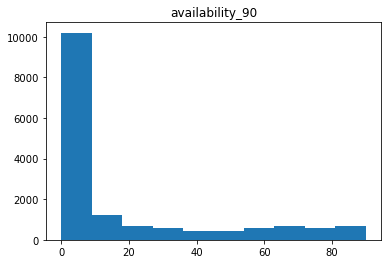

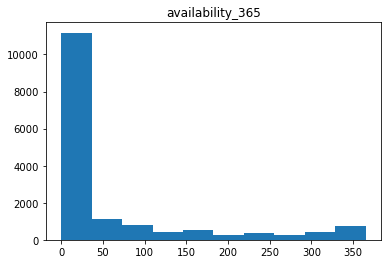

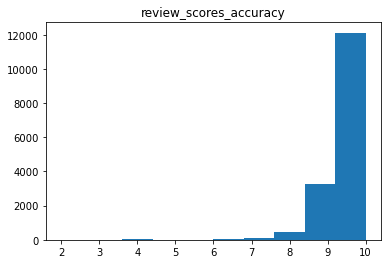

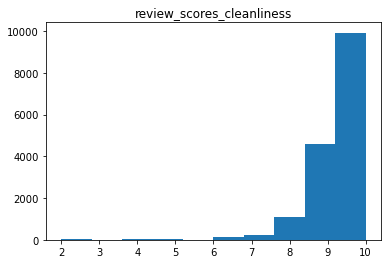

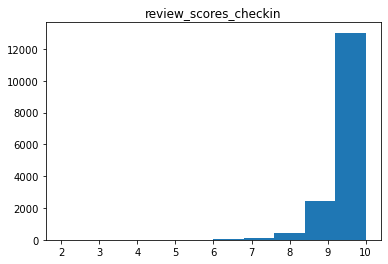

In [32]:
# Histograms of all vars with power transformation BoxCox

# set vars to check
check_vars = ['host_since', 'host_listings_count', 'bathrooms',
       'price', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','combine_beds_bedrooms_acommodates',
           'reviews_per_month','availability_30', 'availability_60','availability_90', 'availability_365',
            'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin']

# For loop on showing separate histograms per item
i = 0
for x in check_vars:
    # set data
    data = df_model_merged[x]
    
    # plot
    plt.figure(i)
    plt.title(x)
    plt.hist(data)
    print(plt.figure(i))
    
    # iterate 
    i = i + 1
    



In [33]:
# list of variables that need to be transformed to fit a normal distribution

to_check_vars = ['price','host_listings_count','bathrooms','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating',
            'review_scores_communication','review_scores_location','review_scores_value','review_scores_accuracy',
             'review_scores_cleanliness','review_scores_checkin',
             'combine_beds_bedrooms_acommodates',
            'reviews_per_month'
           ]


poly_vars = ['availability_30','availability_60','availability_90','availability_365']

# Boxcox transform and check outputs

0.2534562309914616
Figure(432x288)
-2.3241433733344725
Figure(432x288)
-1.5332310285044504
Figure(432x288)
-0.8014419021313236
Figure(432x288)
0.23858506041279126
Figure(432x288)
-0.1572377035378883
Figure(432x288)
11.421728636272807
Figure(432x288)
46.93358536691012
Figure(432x288)
8.231315141175584
Figure(432x288)
5.1890734888226575
Figure(432x288)
25.866779983941093
Figure(432x288)
11.23399081704968
Figure(432x288)
36.91339959827809
Figure(432x288)
-2.033665923323398
Figure(432x288)
-1.1446132488346121
Figure(432x288)


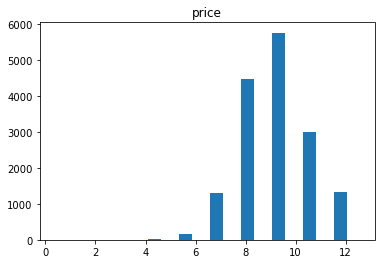

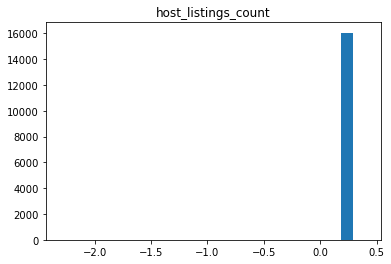

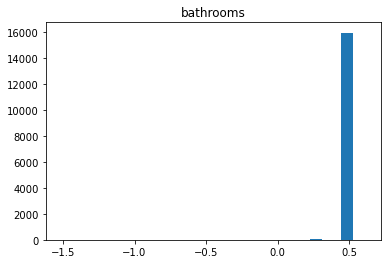

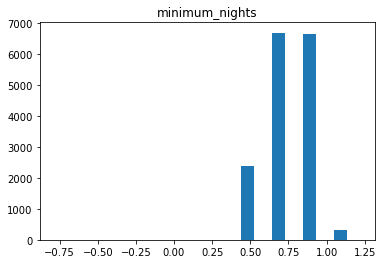

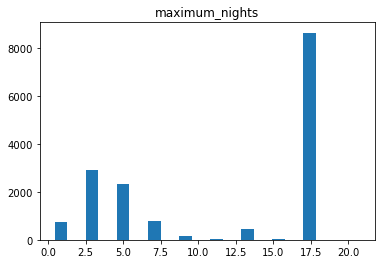

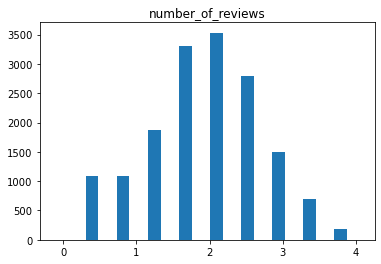

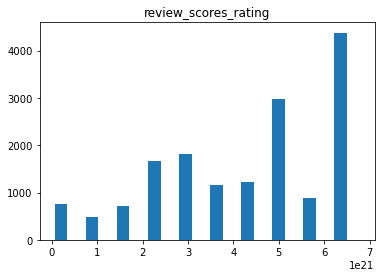

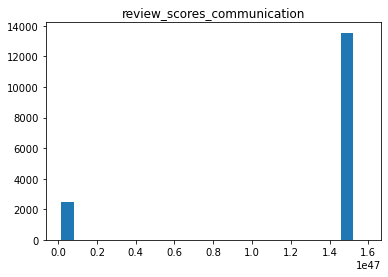

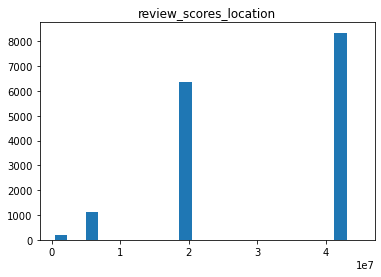

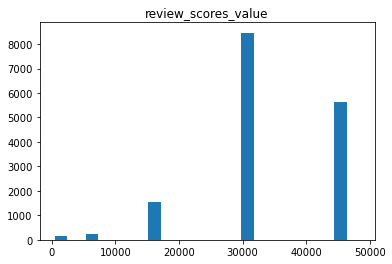

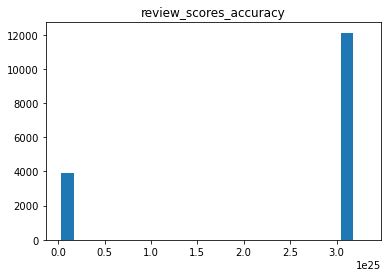

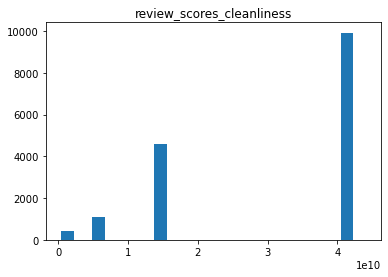

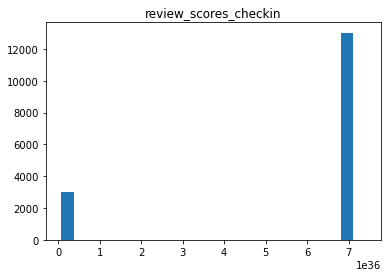

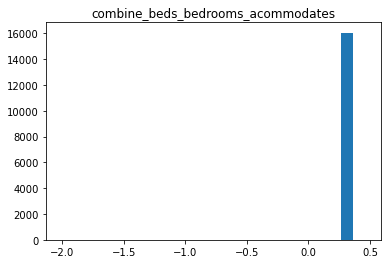

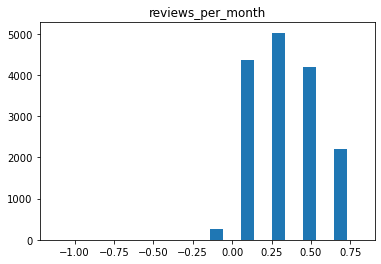

In [34]:
# For loop on showing separate histograms per item
i = 0
for x in to_check_vars:
    plt.figure(i)
    plt.title(x)
    
    # power transform
    data = df_model_merged[x] + 1
    data = boxcox(data)
    
    #print the boxcox lambda value
    print(data[1])
    
    #plot the graph
    plt.hist(data)
    print(plt.figure(i))
    
    #increment the counter
    i = i + 1

# Mark variables that can fit a normal distribution and get rid a few others

In [35]:
# variables to keep and boxcox transform 
boxcox_vars = ['price','number_of_reviews','review_scores_rating',
            'review_scores_location','review_scores_value'
              ,'combine_beds_bedrooms_acommodates']


# variables to drop
to_drop = ['host_listings_count','bathrooms','minimum_nights','maximum_nights',
           'review_scores_communication','review_scores_accuracy','review_scores_cleanliness',
           'review_scores_checkin','reviews_per_month']

In [36]:
#drop variables
df_model_merged = df_model_merged.drop(to_drop,axis=1)

#drop poly variables
df_model_merged = df_model_merged.drop(poly_vars,axis=1)


# Boxcox transform needed variables

In [37]:
# create boxcox in dataframe function
def create_boxcox_df(df, boxcox_vars):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    boxcox_vars - list of strings that are associated with selected boxcox columns
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as boxcox columns
            2. removes all the original columns in boxcox_vars
            3. boxcox transforms for each of the boxcox columns in boxcox_vars
            4. returns df
            5. returns list of lambda values for maxlog()
    '''
    #iniate empty list
    lambda_list = list()
    
    #start for loop
    for col in boxcox_vars:
        try:
            # for each var boxcox transform
            data = df[col] +1
            data = boxcox(data)
            
            #lambda list append
            lambda_list.append(data[1])
            
            #create dataframe from array
            df_insert = pd.DataFrame(data[0],columns = [col],index = df_model_merged.index)
            
            #concat dataframes
            df = pd.merge(df_insert,df.drop(col, axis=1), right_index=True, left_index=True)

            
        except:
            continue
    return df, lambda_list

In [38]:
# apply to dataframe
df_model_merged, lambda_list = create_boxcox_df(df_model_merged,boxcox_vars=boxcox_vars)


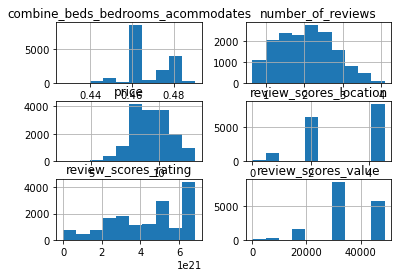

None


In [39]:
# histograms of the variables
df_hist = df_model_merged[boxcox_vars]

df_hist.hist()
print(plt.show())

# Standardization with StandardScaler

In [40]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler

# take all the variables that we want to standardize 
scaler_vars = ['number_of_reviews','review_scores_rating',
            'review_scores_location','review_scores_value'
              ,'combine_beds_bedrooms_acommodates']


# initiate standardscaler and apply to data
sc = StandardScaler()
scaled_array = sc.fit_transform(df_model_merged[scaler_vars])

# create new dataframe with scaled variables
df_model_scaled = pd.DataFrame(scaled_array, columns = scaler_vars, index = df_model.index)

# merge them all back together
df_model_merged = pd.merge(df_model_scaled,df_model_merged.drop(scaler_vars,axis=1), right_index=True, left_index=True)

#print(df_model_merged.describe())

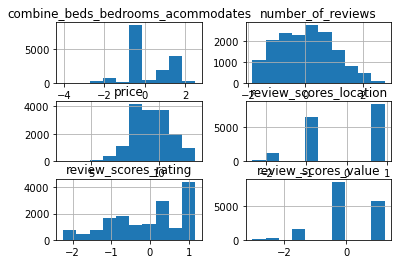

None


In [41]:
# histograms of the variables
df_hist = df_model_merged[boxcox_vars]

df_hist.hist()
print(plt.show())

# Look at all adapted distributions

<function matplotlib.pyplot.show(*args, **kw)>

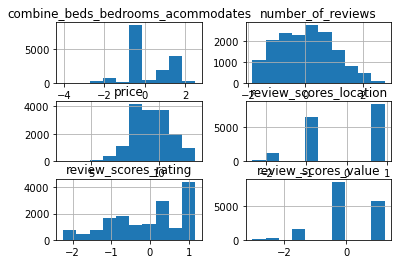

In [42]:
# histograms of the variables
df_hist = df_model_merged[boxcox_vars]

df_hist.hist()
plt.show



# Check for Multicollinearity

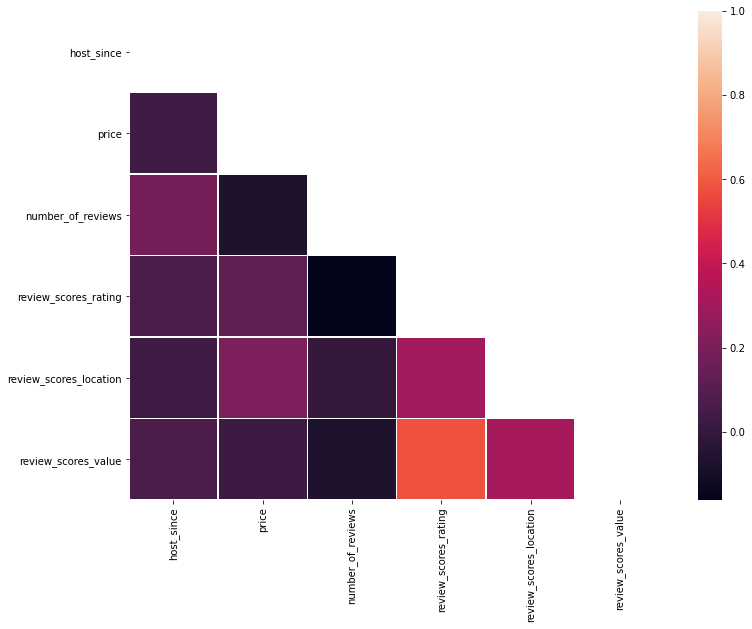

In [43]:
num_vars = ['host_since','price','number_of_reviews', 'review_scores_rating', 'review_scores_location','review_scores_value']

#df_plot = df_model_merged.select_dtypes(include=[np.number])
df_plot = df_model_merged[num_vars]

matrix = np.triu(df_plot.corr())

plt.figure(figsize=(12, 9))
sns.heatmap(df_plot.corr(), annot=False, mask=matrix, linewidths=.5, fmt='.1f')

# Take out variables where needed to avoid multicollinearity

In [44]:
# based on above correlation matrix, take out a few columns
df_model_merged = df_model_merged.drop(['review_scores_value'],axis=1)



# Modeling

* Implement Sklearn Linear Regression
* Refine with some PolyNomial Features
* Implement Sklearn RandomForestRegressor
* Implement Statsmodels OLS
* Implement H2O AutoML


In [45]:
def fit_linear_mod(df, response_col, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    This function should:
    1. Split your data into an X matrix and a response vector y
    2. Create training and test sets of data
    3. Instantiate a LinearRegression model with normalized data
    4. Fit your model to the training data
    5. Predict the response for the training data and the test data
    6. Obtain an rsquared value for both the training and test data
    '''

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds, y_train_preds

# Use dataframe before preprocessing

In [46]:

#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds, y_train_preds = fit_linear_mod(df_model, 'price')

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

# The coefficients
#print('Coefficients: \n', lm_model.coef_)

# print RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_preds)))

The rsquared on the training data was 0.510845059063316.  The rsquared on the test data was 0.486290227453942.
Root Mean Squared Error: 37.19516677749995


# Use dataframe after preprocessing

In [47]:
# after preprocessing

#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds, y_train_preds = fit_linear_mod(df_model_merged, 'price')

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

# The coefficients
#print('Coefficients: \n', lm_model.coef_)

# print RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_preds)))

The rsquared on the training data was 0.4965681743295157.  The rsquared on the test data was 0.4844860451310212.
Root Mean Squared Error: 0.9659187839174531


# PCA analysis


In [48]:
# Applying PCA function on training 
from sklearn.decomposition import PCA 
  
pca = PCA()
  
X_train = pca.fit_transform(X_train) 
  
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[9.99980112e-01 3.18419367e-06 2.65594483e-06 2.25795022e-06
 1.59205322e-06 9.19637797e-07 7.50607380e-07 6.38398647e-07
 5.10322131e-07 4.92027916e-07 4.64937129e-07 4.52465108e-07
 4.12142015e-07 3.74650064e-07 3.69266454e-07 3.63693307e-07
 2.89047856e-07 2.63966388e-07 2.48341608e-07 2.15450351e-07
 2.05381862e-07 1.90919665e-07 1.85939980e-07 1.73633238e-07
 1.71833003e-07 1.66502012e-07 1.60569446e-07 1.55239777e-07
 1.42425178e-07 1.36198541e-07 1.27171034e-07 1.25279653e-07
 1.21448631e-07 1.20090110e-07 1.18287885e-07 1.04742373e-07
 9.20361875e-08 8.75769942e-08 6.61766835e-08 6.31681062e-08
 5.87379466e-08 5.65867673e-08 5.01622915e-08 4.90440585e-08
 4.70912698e-08 4.38245510e-08 4.23253537e-08 4.02716586e-08
 3.79559812e-08 3.68279396e-08 2.97642991e-08 2.81281371e-08
 2.64419567e-08 2.40721523e-08 2.13599608e-08 1.86860582e-08
 1.54514775e-08 1.48003749e-08 1.19585964e-08 9.00668269e-09
 7.83840250e-09 7.70729776e-09 7.60817209e-09 5.92157246e-09
 5.29804666e-09 4.631569

# Implement Statsmodels OLS

In [49]:
#import statsmodel library
import statsmodels.api as sm

#set response column and df to use
response_col = 'price'
df_to_use_ols = df_model_merged

# set X matrix and y 
X = df_to_use_ols.drop(response_col, axis=1)
X = sm.add_constant(X)
y = df_to_use_ols[response_col]

# fit and predict
est = sm.OLS(y.astype(float), X.astype(float)).fit()
ypred = est.predict(X)

# evaluate
rmse = np.sqrt(mean_squared_error(y, ypred))
print(rmse)

# show stats summary
est.summary()


0.957832830818356


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     181.5
Date:                Thu, 25 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:36:33   Log-Likelihood:                -22095.
No. Observations:               16059   AIC:                         4.436e+04
Df Residuals:                   15972   BIC:                         4.503e+04
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                             8.8062      0.803     10.969      0.000       7.233      10.380
number_of_reviews                                                -0.0387      0.009     -4.090      0.000      -0.057      -0.020
review_scores_rating                                              0.0853      0.009      9.784      0.000       0.068       0.102
review_scores_location                                            0.0880      0.009      9.608      0.000       0.070       0.106
combine_beds_bedrooms_acommodates                                 0.5385      0.009     59.810      0.000       0.521       0.556
host_since                                                    -6.108e-06   1.32e-05     -0.462      0.644    -3.2e-05    1.98e-05
host_is_superhost                                                 0.0950      0.023      4.189      0.000       0.051       0.139
host_has_profile_pic                                             -0.1071      0.304     -0.352      0.725      -0.704       0.490
host_identity_verified                                           -0.0365      0.017     -2.177      0.029      -0.069      -0.004
is_location_exact                                                 0.0433      0.017      2.584      0.010       0.010       0.076
instant_bookable                                                  0.0665      0.019      3.472      0.001       0.029       0.104
is_business_travel_ready                                      -1.396e-14   9.87e-15     -1.414      0.157   -3.33e-14    5.39e-15
require_guest_profile_picture                                     0.1597      0.104      1.534      0.125      -0.044       0.364
require_guest_phone_verification                                 -0.0678      0.091     -0.742      0.458      -0.247       0.111
has_tv                                                            0.2157      0.053      4.080      0.000       0.112       0.319
has_fireplace                                                     0.3811      0.038     10.091      0.000       0.307       0.455
has_kitchen                                                      -0.0650      0.032     -2.044      0.041      -0.127      -0.003
has_family_friendly                                               0.0596      0.017      3.461      0.001       0.026       0.093
has_host_greeting                                                 0.1399      0.018      7.889      0.000       0.105       0.175
has_24hrs_checkin                                                 0.0670      0.026      2.573      0.010       0.016       0.118
has_breakfast                                                     0.0400      0.031      1.29

# Implement RandomForestRegressor

In [50]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)

response_col = 'price'
df_rfr_to_use = df_model_merged

X = df_rfr_to_use.drop(response_col, axis=1)
y = df_rfr_to_use[response_col]
regr.fit(X, y)
modelPred = regr.predict(X)

print("The R2 score: ",regr.score(X,y))

print("Number of predictions:",len(modelPred))

meanSquaredError=mean_squared_error(y, modelPred)
print("MSE:", meanSquaredError)
rootMeanSquaredError = np.sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)


The R2 score:  0.35074063108308107
Number of predictions: 16059
MSE: 1.177719511150194
RMSE: 1.0852278613960267


# Implement H2O AutoML solution

In [51]:
#https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html
# tutorial: https://github.com/h2oai/h2o-tutorials/blob/master/h2o-world-2017/automl/Python/automl_binary_classification_product_backorders.ipynb

import h2o
from h2o.automl import H2OAutoML
h2o.init()

df_h2o_to_use = df_model_merged

# Identify predictors and response
x = df.columns.tolist()
y = "price"
x = x.remove(y)

df_model_h2o = h2o.H2OFrame(df_h2o_to_use)


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpu_n4og26
  JVM stdout: /tmp/tmpu_n4og26/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpu_n4og26/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_unknownUser_tobh81
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [52]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=df_model_h2o)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20200625_003646,0.895009,0.946049,0.895009,0.738556,0.091517
StackedEnsemble_BestOfFamily_AutoML_20200625_003646,0.895997,0.946571,0.895997,0.739257,0.0915679
GBM_grid__1_AutoML_20200625_003646_model_1,0.900758,0.949083,0.900758,0.742087,0.0918195
GBM_1_AutoML_20200625_003646,0.901634,0.949544,0.901634,0.742309,0.0919484
GBM_3_AutoML_20200625_003646,0.902059,0.949768,0.902059,0.742114,0.0919485
GBM_2_AutoML_20200625_003646,0.903343,0.950444,0.903343,0.742069,0.0919694
GBM_5_AutoML_20200625_003646,0.906222,0.951957,0.906222,0.742408,0.092332
XGBoost_grid__1_AutoML_20200625_003646_model_3,0.906398,0.952049,0.906398,0.744102,0.0921863
XGBoost_grid__1_AutoML_20200625_003646_model_4,0.908583,0.953196,0.908583,0.744957,0.0922579
GBM_grid__1_AutoML_20200625_003646_model_2,0.912297,0.955143,0.912297,0.746437,0.0924925
